In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')
import seaborn as sns
sns.set_style({'font.sans-serif':['simhei','Arial']})

In [3]:
lianjia = pd.read_csv('C:/lianjia.csv')
lianjia.head()

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


In [4]:
lianjia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


数据集一共有23677条数据，可以明显发现Elevator有缺失值。

下面看看描述特征

In [6]:
lianjia.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


从数值统计值中初步可以发现：
- Price特征下平均数与中位数的差值较为明显，可能存在极值干扰。
- Size从min为2平米，max为1019平米，思考可能存在异常值。

In [24]:
df = lianjia.copy()
#新建特征——均价
df['PerPrice'] = lianjia.Price/lianjia.Size
names = ['Region','District','Garden','Layout','Floor','Size','Elevator','Year','Direction','Renovation','Price','PerPrice']
df = pd.DataFrame(df,columns = names)
df.head()

,Region,District,Garden,Layout,Floor,Size,Elevator,Year,Direction,Renovation,Price,PerPrice
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,75.0,NaN,1988,东西,精装,780.0,10.400000
1,东城,东单,东华门大街,2室1厅,6,60.0,无电梯,1988,南北,精装,705.0,11.750000
2,东城,崇文门,新世界中心,3室1厅,16,210.0,有电梯,1996,南西,其他,1400.0,6.666667
3,东城,崇文门,兴隆都市馨园,1室1厅,7,39.0,NaN,2004,南,精装,420.0,10.769231
4,东城,陶然亭,中海紫御公馆,2室2厅,19,90.0,有电梯,2010,南,精装,998.0,11.088889


### Region 特征分析

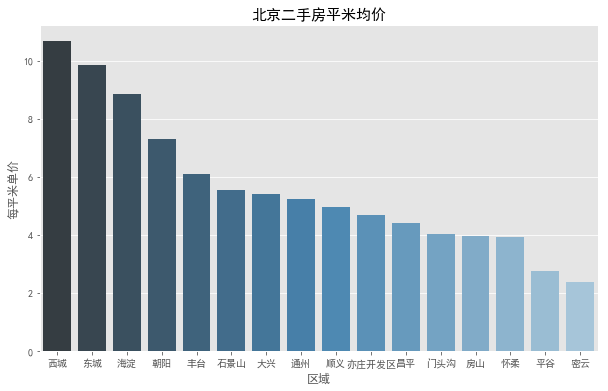

In [34]:
df_house = df.groupby('Region')['Price'].count().sort_values(ascending=False).reset_index()
df_housemean = df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).reset_index()

f,ax1 = plt.subplots(figsize=(10,6))
sns.barplot(x='Region',y='PerPrice',palette='Blues_d',data=df_housemean,ax=ax1)
ax1.set_title('北京二手房平米均价',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')
plt.show()

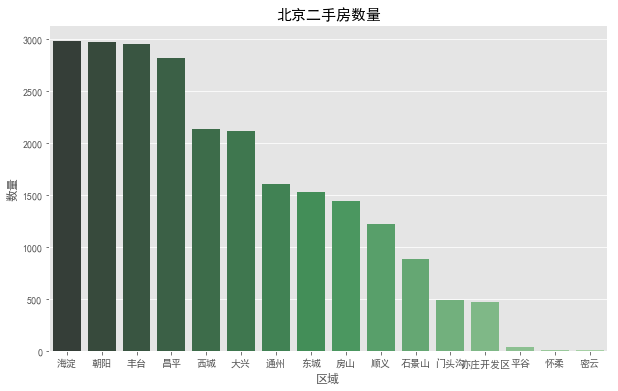

In [35]:
f,ax2 = plt.subplots(figsize=(10,6))
sns.barplot(x='Region',y='Price',palette='Greens_d',data=df_house,ax=ax2)
ax2.set_title('北京二手房数量',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')
plt.show()

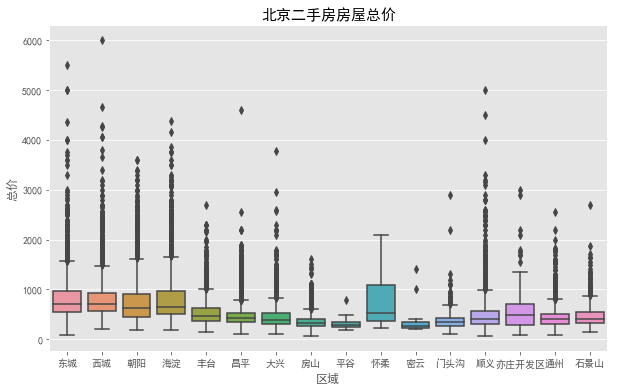

In [50]:
f,ax3 = plt.subplots(figsize=(10,6))
sns.boxplot(x='Region',y='Price',data=df,ax=ax3)
ax3.set_title('北京二手房房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('总价')
plt.show()

利用seaborn的palette参数，完成区域数据特征可视化，可以看到:
- 二手房均价：西城以内的房价最高，约11万每平，查找原因可能是因为西城在二环以内，附件学校众多，是学区房的集中地。其次是东城区约10万每平，而后是海淀区，其余均低于8万每平。
- 二手房数量：最高的前三数量相当接近，以海淀区数量最多，大区的需求量也大，其次丰台区，近年经济提升势头强劲。
- 二手房总价：从箱线图看到各大区域的中位数都在1000万以下，而且极值影响总价的离散度大，西城、东城、顺义最高都在5000万以上。

### Size特征分析

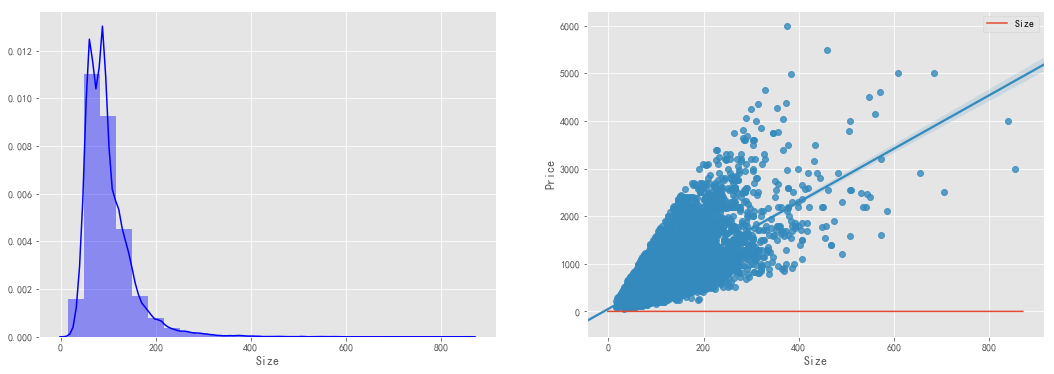

In [51]:
f,[ax1,ax2] = plt.subplots(1,2,figsize=(18,6))
sns.distplot(df['Size'],bins=25,ax=ax1,color='b')
sns.kdeplot(df['Size'],shade=True,ax=ax2)
sns.regplot(x='Size',y='Price',data=df,ax=ax2)
plt.show()

- 通过distplot和kdeplot绘制柱状图，观察Size特征的分布情况，属于长尾类型的分布，说明有很多面积大且超出正常范围的二手房。
- Size与Price：通过regplot描绘散点图，Price与Size基本满足线性回归，但可以看到一些异常值：1.Size接近0值下存在一些错误值，价格超过了1000万；2.一个点面积超过1000平米，但价格很低，需要查看返回。

In [46]:
df.loc[df.Size<10]

,Region,District,Garden,Layout,Floor,Size,Elevator,Year,Direction,Renovation,Price,PerPrice
1168,房山,长阳,世茂维拉,叠拼别墅,5,5.0,毛坯,2015,240.97平米,南北,1080.0,216.000000
1458,房山,长阳,世茂维拉,叠拼别墅,5,5.0,毛坯,2015,242.78平米,南北,1100.0,220.000000
1797,房山,长阳,世茂维拉,叠拼别墅,5,5.0,精装,2015,242.96平米,南北,980.0,196.000000
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4,4.0,精装,2014,295.88平米,南北,1000.0,250.000000
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4,5.0,精装,2014,295.01平米,南北,1450.0,290.000000
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3,4.0,毛坯,2014,292.31平米,南北,860.0,215.000000
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5,6.0,精装,2013,294.42平米,南北,980.0,163.333333
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3,4.0,精装,2015,427.5平米,南北,3150.0,787.500000
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4,4.0,精装,2015,361.8平米,南北,2380.0,595.000000
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3,5.0,精装,2015,386.83平米,南北,2700.0,540.000000


- 查看第一组异常值，发现这组数据是**别墅**，出现异常的原因是别墅结构比较特殊，没有电梯，可能是原数据爬取数据错误，考虑将其移除。

In [47]:
df.loc[df.Size>1000]

,Region,District,Garden,Layout,Floor,Size,Elevator,Year,Direction,Renovation,Price,PerPrice
8754,通州,通州其它,新华联科技大厦,1房间0卫,8,1019.0,有电梯,2009,南,简装,1700.0,1.668302


- Layout查看到可能此房是商用房，不是普通民用房，所以选择移除。

In [48]:
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]

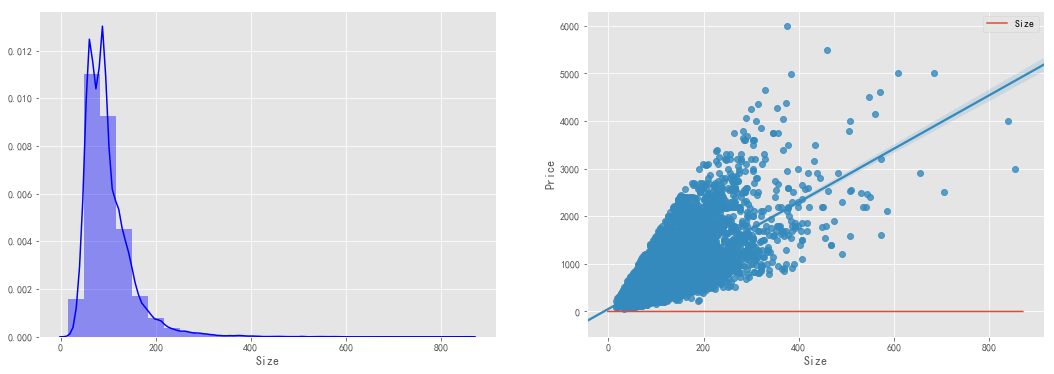

In [52]:
#重新可视化查看
f,[ax1,ax2] = plt.subplots(1,2,figsize=(18,6))
sns.distplot(df['Size'],bins=25,ax=ax1,color='b')
sns.kdeplot(df['Size'],shade=True,ax=ax2)
sns.regplot(x='Size',y='Price',data=df,ax=ax2)
plt.show()

### Layout特征分析

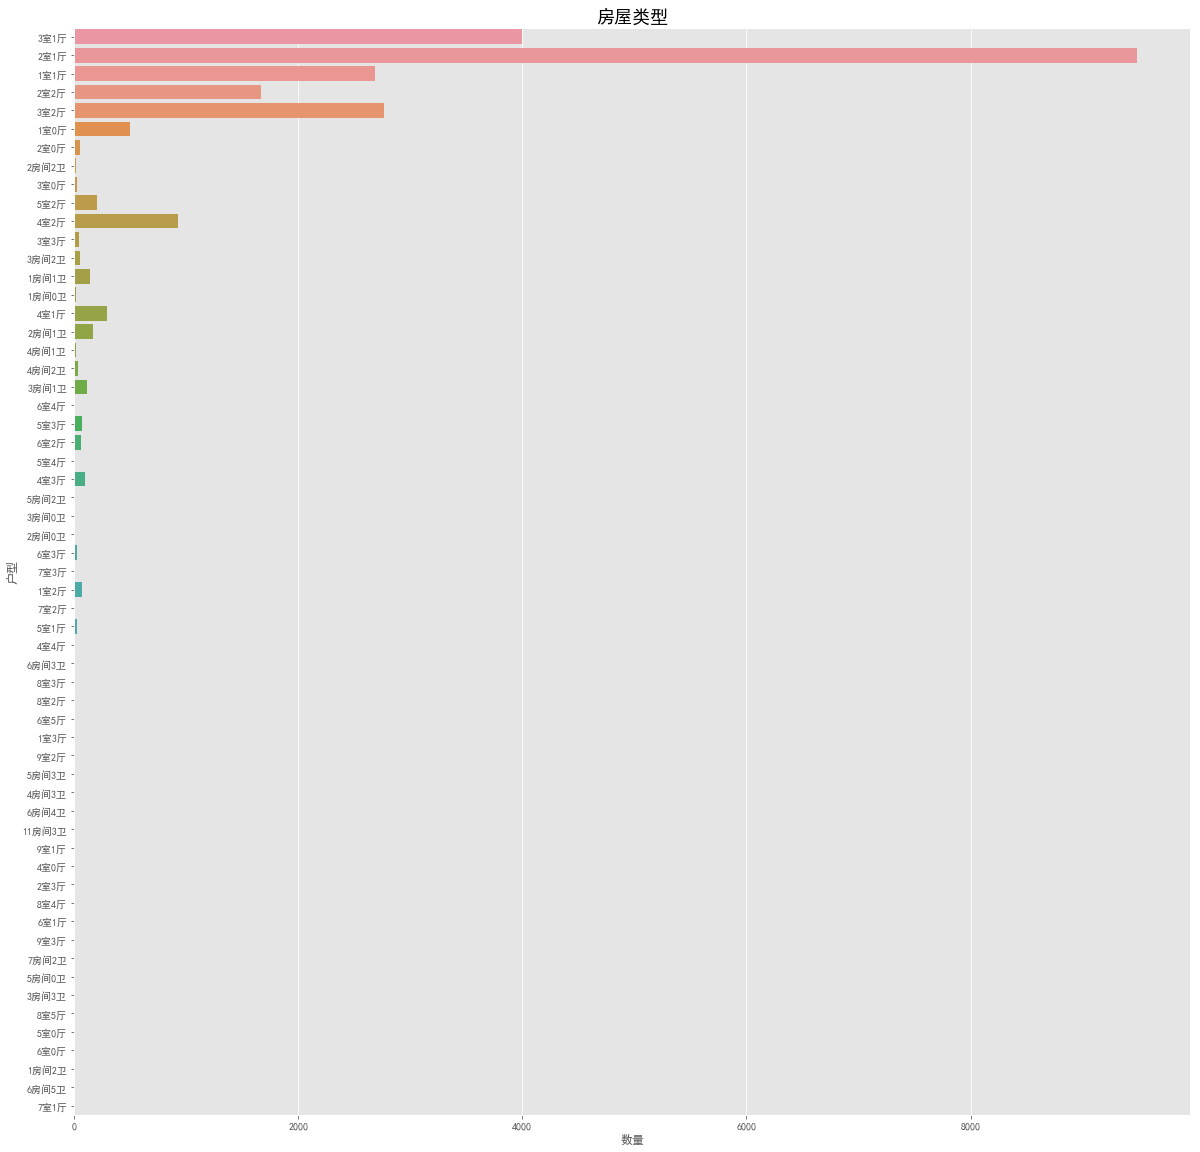

In [55]:
f,ax1 = plt.subplots(figsize=(20,20))
sns.countplot(y='Layout',data=df,ax=ax1)
ax1.set_title('房屋类型',fontsize=18,fontweight='bold')
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

- 2室1厅占据了绝对的主体，这也是大多数人群喜好且能承担的户型。
- 户型搭配组合还有4室4厅，6室0厅等奇怪结构。
- 户型名称不规范，有2室1厅，还有2房间1卫，需要使用特征工程进行相应的处理。

In [57]:
df.Renovation.value_counts()

精装    11345
简装     8496
其他     3239
毛坯      576
Name: Renovation, dtype: int64

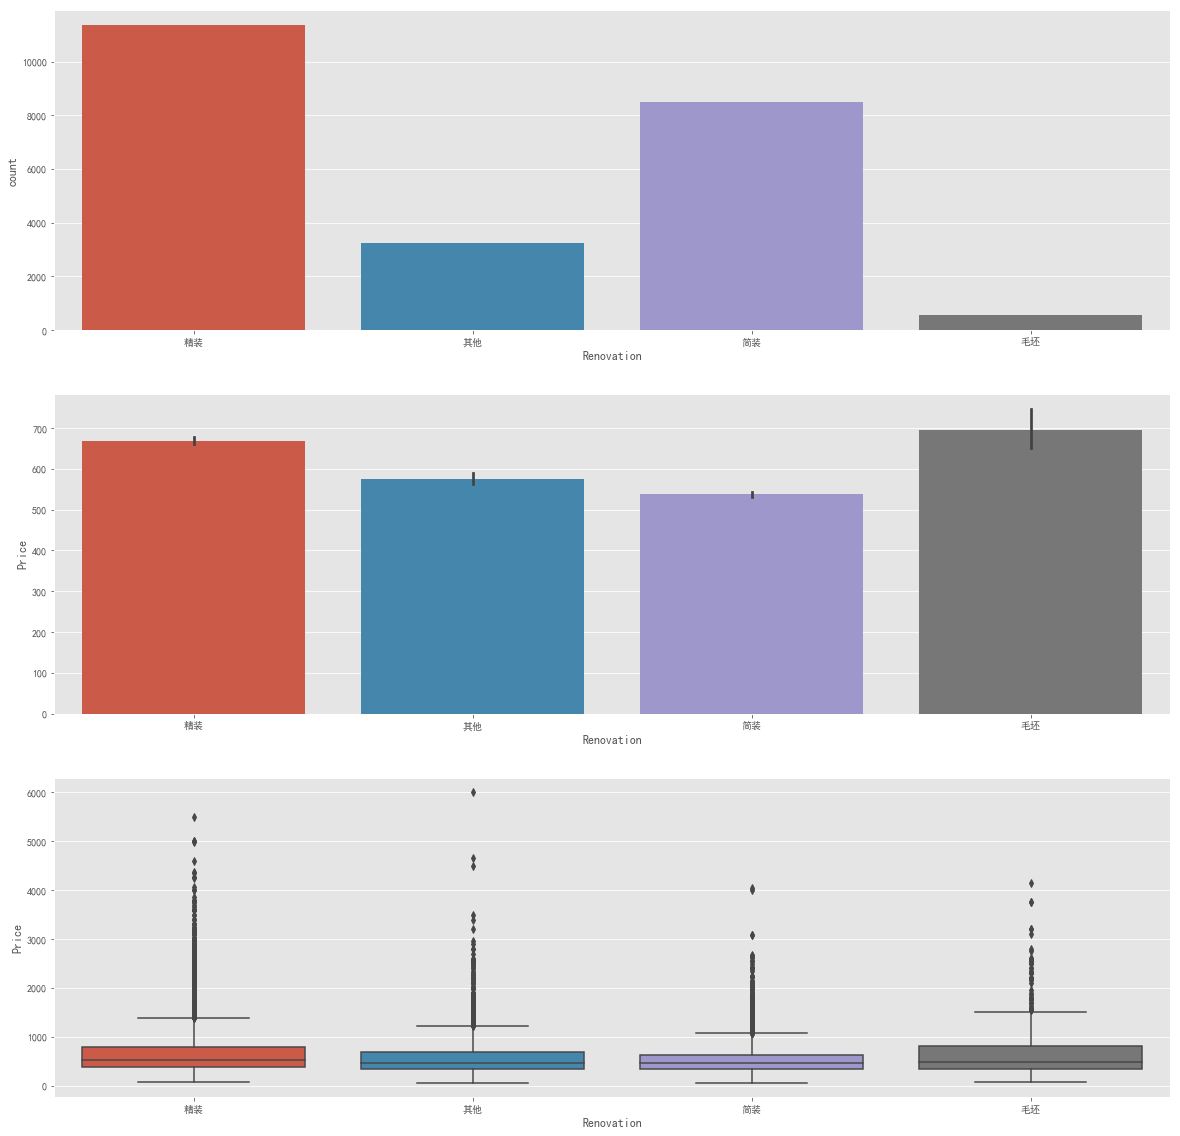

In [61]:
f,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,20))
sns.countplot(df.Renovation,ax=ax1)
sns.barplot(x='Renovation',y='Price',data=df,ax=ax2)
sns.boxplot(x='Renovation',y='Price',data=df,ax=ax3)
plt.show()

- 精装修的二手房数量最多，其次是简装，是我们平常最常见的。
- 价格方面，以毛坯房价格最高。

### Elevator特征分析

In [67]:
#查看缺失值
mis_e = len(df.loc[(df.Elevator.isnull()),'Elevator'])
print('Elevator的缺失数量为：'+str(mis_e))

Elevator的缺失数量为：8237


- 对缺失值的处理方法有平均数/中位数填补法，直接移除，或者根据其他特征预测。
- 这里用填补法，结合生活实际，根据楼层数判断电梯有无，大于6层的有电梯，小于等于6层的没有电梯。

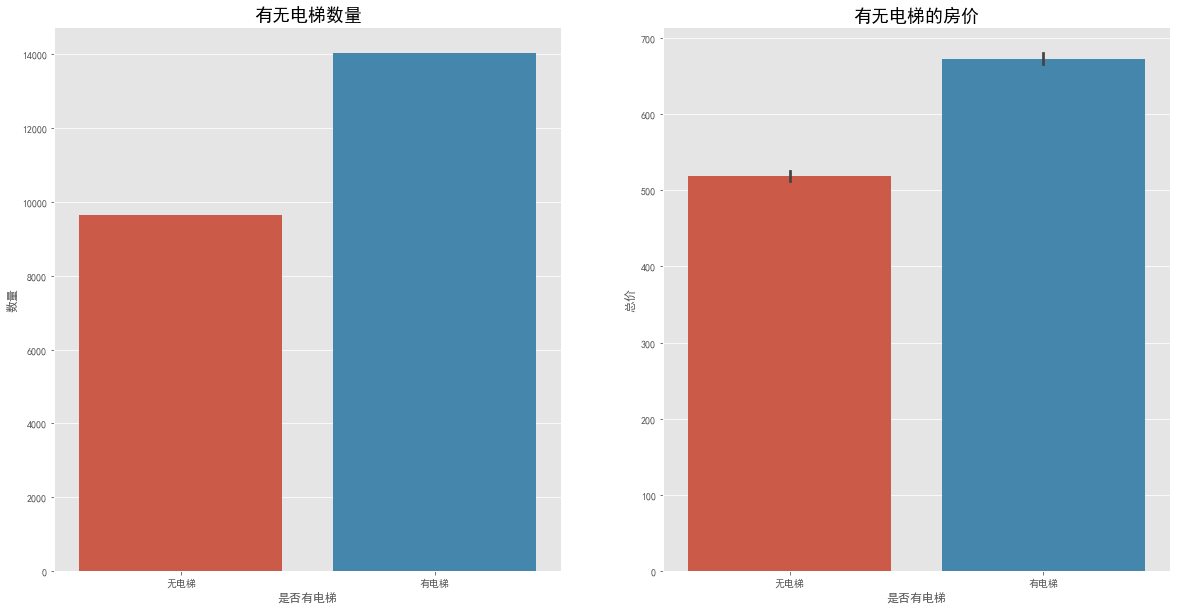

In [75]:
df.Elevator = df.loc[(df.Elevator =='有电梯')|(df.Elevator=='无电梯'),'Elevator']
df.loc[(df.Floor>6)&(df.Elevator.isnull()),'Elevator'] = '有电梯'
df.loc[(df.Floor<=6)&(df.Elevator.isnull()),'Elevator'] = '无电梯'
f,[ax1,ax2] = plt.subplots(1,2,figsize=(20,10))
sns.countplot(df.Elevator,ax=ax1)
ax1.set_title('有无电梯数量',fontsize=18)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')
sns.barplot(x='Elevator',y='Price',data=df,ax=ax2)               
ax2.set_title('有无电梯的房价',fontsize=18)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()

               


- 有电梯的二手房数量居多，考虑土地利用率来说比较合理，符合北京庞大人口的需要。
- 带电梯的二手房房价更高，因为电梯前期安装和后续维护费用。

### Floor特征分析

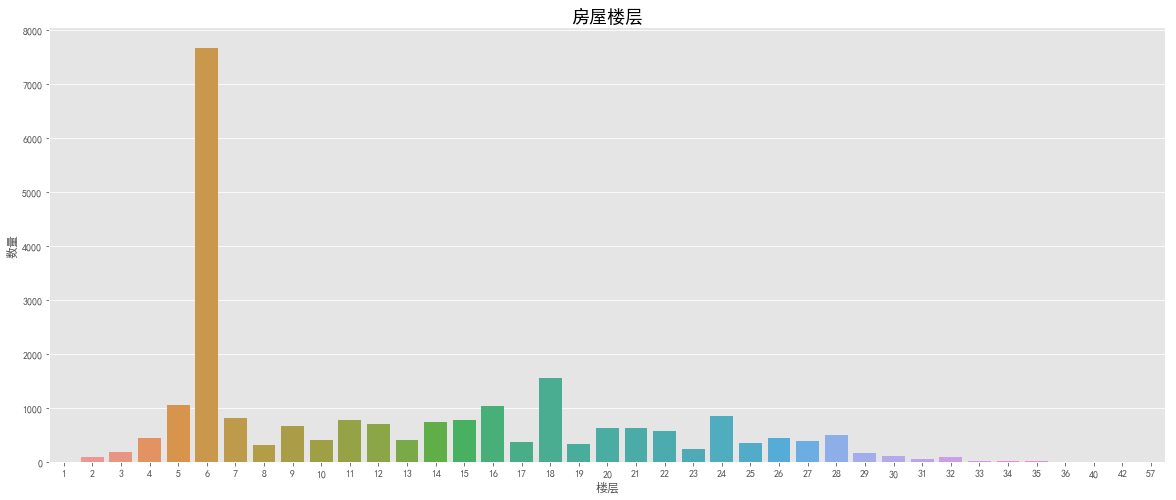

In [77]:
f,ax1 = plt.subplots(figsize=(20,8))
sns.countplot(x='Floor',data=df,ax=ax1)
ax1.set_title('房屋楼层',fontsize=18)
ax1.set_xlabel('楼层')
ax1.set_ylabel('数量')
plt.show()

- 可以看到，6层的二手房数量最多，但是结合实际来看，单纯的楼层特征意义不大，需要结合总楼层数来看。

### Year特征分析

E:\Software\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


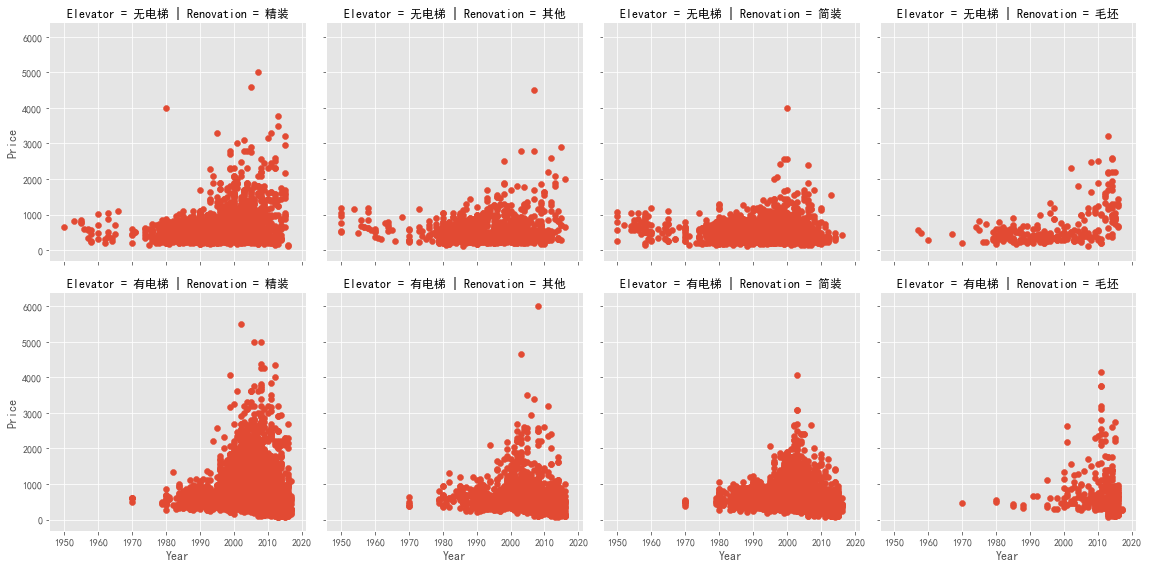

In [81]:
grid = sns.FacetGrid(df,row='Elevator',col='Renovation',palette='seismic',size=4)
grid.map(plt.scatter,'Year','Price')
grid.add_legend()

使用FaceGrid分析Year特征，在Renovation和Elevator分类条件下，观察结果：
- 二手房房价的趋势是随着时间增长而增长的，正相关；
- 在2000年左右的房价，前和后的差异较大，2000年后有很明显的上涨；
- 1980年之前几乎没有电梯房数据，说明之前还未有大量电梯房；
- 1980年前的无电梯二手房中，多数为简装，其他的很少